In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
###Read the data from 'Life.csv'.
df=pd.read_csv('life.csv')

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df.drop('Year',inplace=True,axis=1)

In [7]:
status_mapping={'Developing':0,'Developed':1}

In [8]:
df['Status']=df['Status'].map(status_mapping)

In [9]:
df

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Status                           2938 non-null   int64  
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [11]:
df.isnull().sum()

Country                              0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
df.columns                                 

Index(['Country', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
### Clean the column names by removing leading and trailing whitespaces.

df.columns=df.columns.str.strip()

In [14]:
df.columns

Index(['Country', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [15]:
df['Life expectancy'].fillna(df['Life expectancy'].mean(),inplace=True)
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(),inplace=True)

In [16]:
df.isnull().sum()

Country                              0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
df.drop(['Hepatitis B','GDP','Population'],inplace=True,axis=1)

In [18]:
df['Alcohol'].fillna(df['Alcohol'].median(),inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].median(),inplace=True)

In [19]:
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['Polio'].fillna(df['Polio'].median(), inplace=True)
df['Diphtheria'].fillna(df['Diphtheria'].median(), inplace=True)
df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].median(), inplace=True)
df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].median(), inplace=True)

In [20]:
df.isnull().sum()

Country                              0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    167
Schooling                          163
dtype: int64

In [21]:
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)


In [22]:
### Save the cleaned data to 'cleaned.csv'.
df.to_csv('cleaned.csv',index=False)

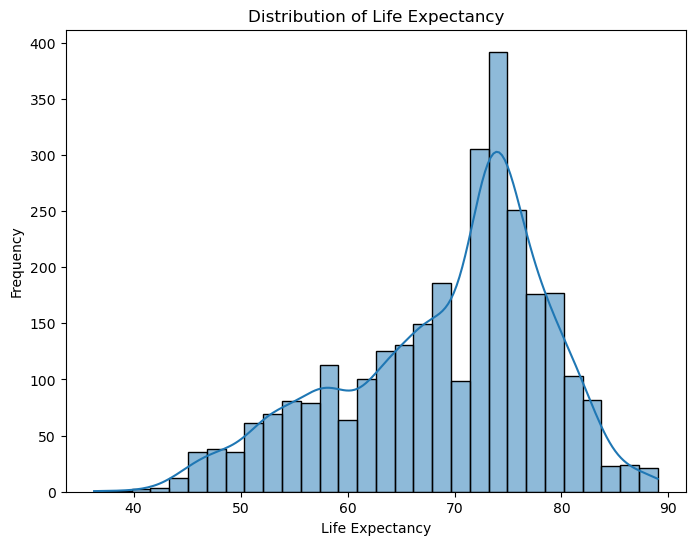

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(df['Life expectancy'],bins=30,kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

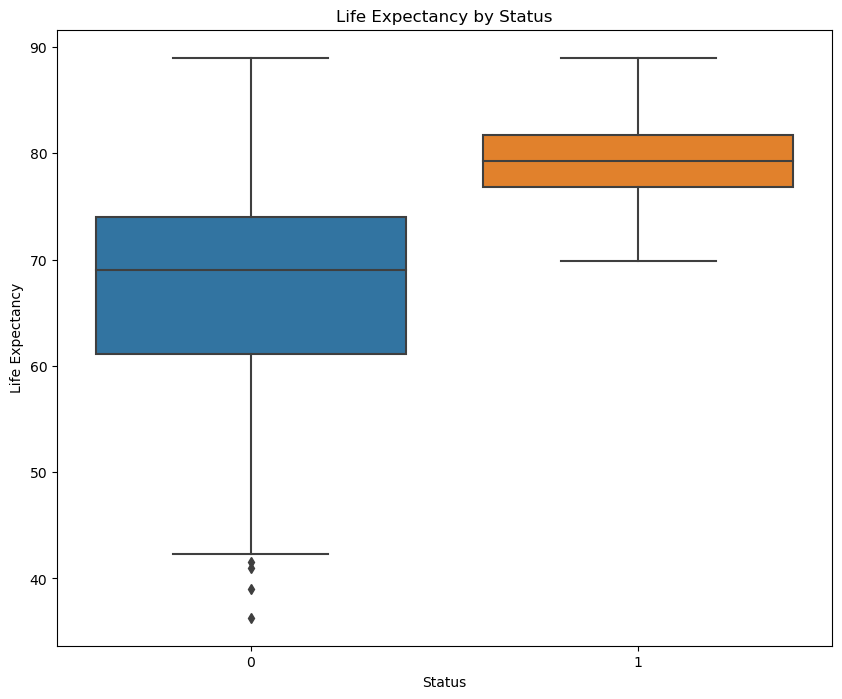

In [24]:
# Boxplot for 'Life expectancy' by 'Status'
plt.figure(figsize=(10, 8))
sns.boxplot(x='Status', y='Life expectancy', data=df)
plt.title('Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()


In [25]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_2390/285072559.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


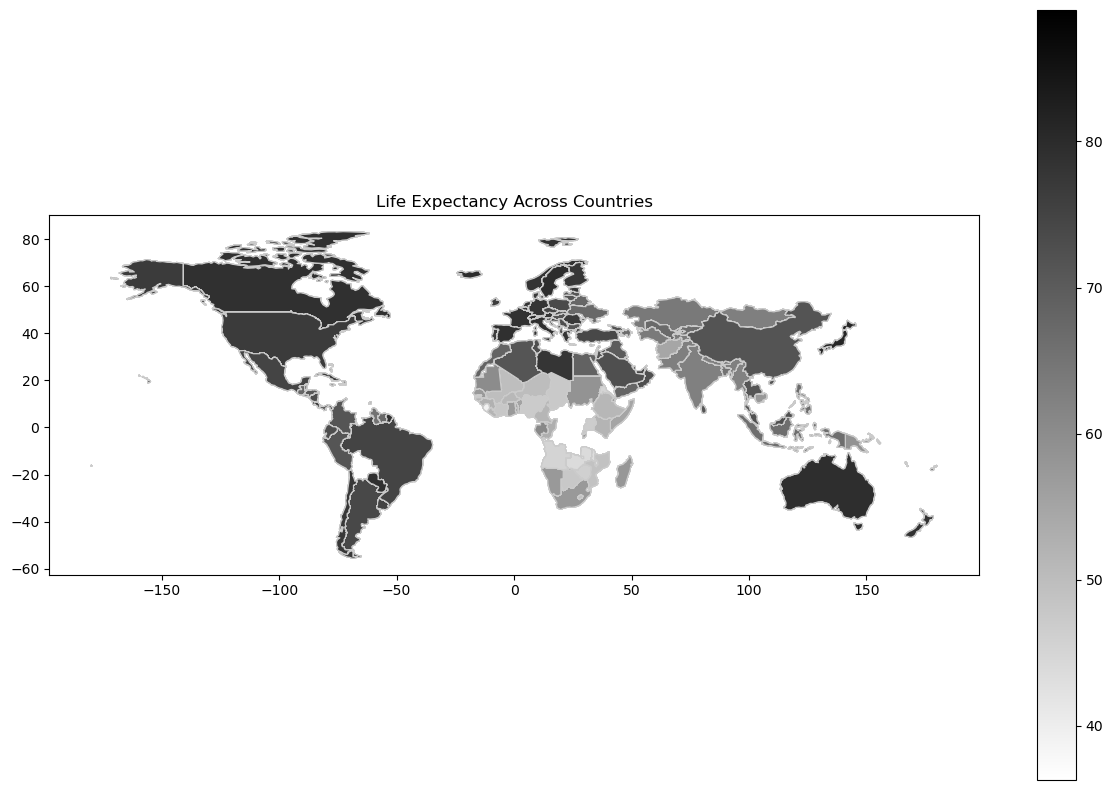

In [47]:
import geopandas as gpd

world= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged=world.merge(df,how='outer',left_on='name', right_on='Country')

fig,ax=plt.subplots(1,1, figsize=(15,10))
merged.plot(column='Life expectancy', cmap='binary', linewidth=0.8 , ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Life Expectancy Across Countries')
plt.savefig('life_expectancy_map.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [27]:
correlation_matrix = df.corr()

/tmp/ipykernel_2390/4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


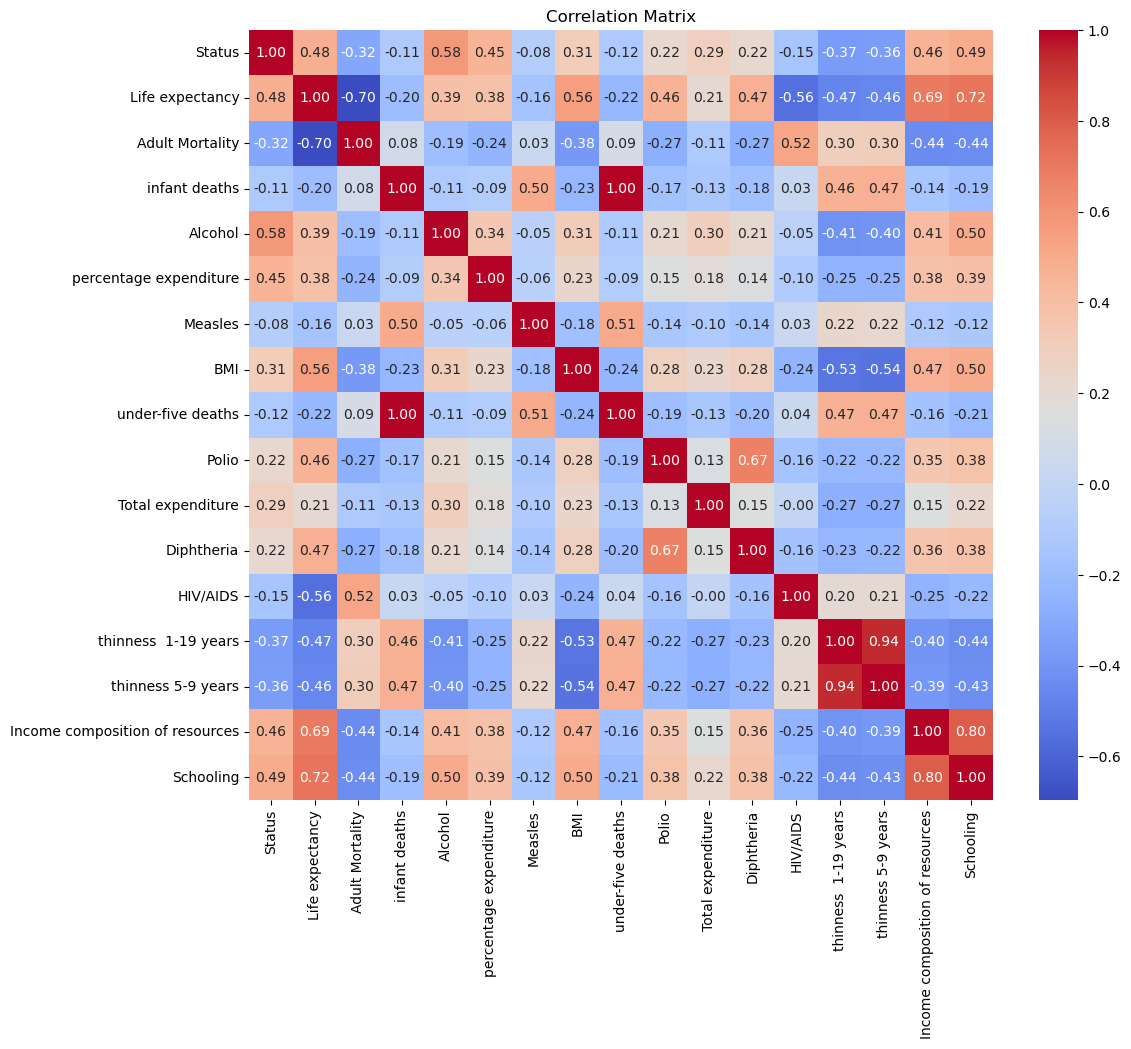

In [28]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


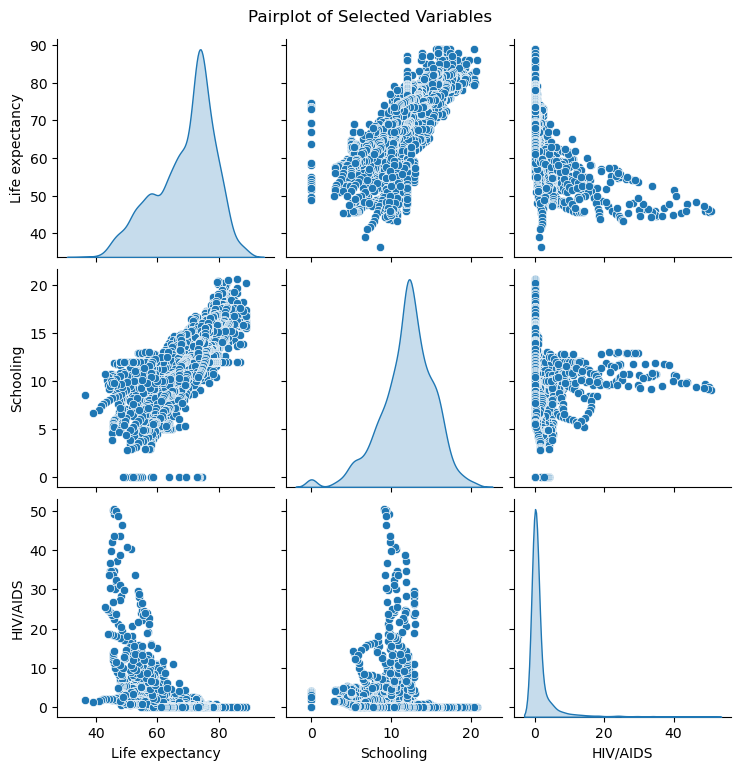

In [29]:
# Pairplot for selected variables
selected_variables = ['Life expectancy','Schooling', 'HIV/AIDS']
sns.pairplot(df[selected_variables], diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

In [30]:
## Dependent Variables and Independent Variables

X = df[['Schooling', 'Adult Mortality', 'Income composition of resources', 'HIV/AIDS', 'BMI', 'Status', 'Diphtheria', 'thinness  1-19 years', 'thinness 5-9 years', 'Polio', 'Alcohol', 'percentage expenditure', 'under-five deaths', 'Total expenditure', 'infant deaths', 'Measles']]
y = df['Life expectancy']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# def correlation(dataset, threshold):
#     col_corr=set()
#     corr_matrix=dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j])>threshold:
#                 colname=corr_matrix.columns[i]
#                 col_corr.add(colname)
#     return col_corr
# corr_features=correlation(X_train,0.85)
# corr_features
# {'BUI', 'DC'}
# X_train.drop(corr_features,inplace=True,axis=1)
# X_test.drop(corr_features,inplace=True,axis=1)

In [33]:
## Function to find the highly correlated columns
def correlation(dataset, threshold):
    col_corr = set()
    col_matrix = dataset.corr()
    for i in range (len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j]>threshold):
                colname=col_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
        

In [34]:
corr_features=correlation(X_train,0.80)

In [35]:
print(corr_features)

{'thinness 5-9 years', 'Income composition of resources', 'infant deaths'}


In [36]:
X_train.drop(corr_features,inplace=True,axis=1)
X_test.drop(corr_features,inplace=True,axis=1)

In [37]:
X_train

,Schooling,Adult Mortality,HIV/AIDS,BMI,Status,Diphtheria,thinness 1-19 years,Polio,Alcohol,percentage expenditure,under-five deaths,Total expenditure,Measles
2285,13.3,177.0,0.1,34.2,0,99.0,5.7,99.0,9.72,1121.475547,0,3.38,0
601,9.9,262.0,0.1,19.6,0,69.0,7.4,69.0,0.25,77.028396,2,4.57,85
360,13.5,159.0,0.1,49.4,0,99.0,3.1,99.0,7.19,394.932130,73,8.28,0
1616,11.8,129.0,0.1,15.6,0,98.0,14.7,97.0,1.98,41.306888,0,5.84,0
303,7.3,312.0,0.1,13.9,0,92.0,19.2,98.0,0.17,93.358728,1,6.91,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,14.8,59.0,0.1,68.0,1,96.0,0.8,96.0,6.91,3601.287457,0,9.60,3
1095,8.9,287.0,5.9,23.1,0,83.0,8.0,82.0,3.21,53.307827,7,6.70,26
1130,8.4,266.0,2.7,4.7,0,63.0,4.2,62.0,6.08,56.778587,23,5.56,0
1294,15.4,72.0,0.1,57.0,1,96.0,0.5,97.0,9.30,3519.258515,3,8.17,10982


In [38]:
scaler=StandardScaler()

In [39]:
X_train=scaler.fit_transform(X_train)

In [40]:
X_test=scaler.transform(X_test)

In [41]:
## Linear Regression
regression=LinearRegression()
regression.fit(X_train,y_train)
y_predict=regression.predict(X_test)
r2=r2_score(y_test,y_predict)
Mae=mean_absolute_error(y_test,y_predict)
print(r2,Mae)

0.8086167379748063 3.0750011274782953


In [42]:
##Lasso 
lasso=Lasso()
lasso.fit(X_train,y_train)
y_predict=lasso.predict(X_test)
r2=r2_score(y_test,y_predict)
Mae=mean_absolute_error(y_test,y_predict)
print(r2,Mae)

0.767577517373738 3.3417758235889754


In [43]:
### Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_predict=ridge.predict(X_test)
r2=r2_score(y_test,y_predict)
Mae=mean_absolute_error(y_test,y_predict)
print(r2,Mae)

0.8086245534709064 3.0750237357502876


In [44]:
### Elastic Net 
enet=ElasticNet()
enet.fit(X_train,y_train)
y_predict=enet.predict(X_test)
r2=r2_score(y_test,y_predict)
Mae=mean_absolute_error(y_test,y_predict)
print(r2,Mae)

0.7635442482753011 3.477403690212848


In [ ]:
# #Converting pickle format
# import pickle
# pickle.dump(scaler,open('scaler.pkl','wb'))
# pickle.dump(regressor,open('regressor.pkl','wb'))

In [45]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))